In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# Load dataset
file_path = "Merged_data_alarm.csv"
df = pd.read_csv(file_path)

# Rename unnamed column to 'Description' if it exists
if '' in df.columns:
    df.rename(columns={df.columns[0]: "Description"}, inplace=True)

# Drop the 'Name' column if it exists
if "Name" in df.columns:
    df.drop(columns=["Name"], inplace=True)

# Clean and encode Severity
if "Severity" in df.columns:
    df["Severity"] = df["Severity"].astype(str).str.strip()
    severity_mapping = {"Minor": 0, "Major": 1, "Warning": 2, "Critical": 3}
    df["Severity"] = df["Severity"].map(severity_mapping)

    # Handle missing Severity values if mode exists
    if not df["Severity"].dropna().empty:
        df.loc[:, "Severity"] = df["Severity"].fillna(df["Severity"].mode()[0])

# Convert time columns to Unix timestamp

def convert_to_unix(time_str):
    try:
        return int(datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S").timestamp())
    except ValueError:
        return np.nan  # Handle missing or incorrect format values

if "Last Occurred (ST)" in df.columns:
    df["Last Occurred (ST)"] = df["Last Occurred (ST)"].apply(convert_to_unix)
if "Acknowledged On (ST)" in df.columns:
    df["Acknowledged On (ST)"] = df["Acknowledged On (ST)"].apply(convert_to_unix)

# Drop unnecessary columns
columns_to_drop = ["Cleared On (ST)", "Maintenance Status", "Maintenance Region"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# Encode categorical columns
categorical_cols = ["Description"] + [col for col in ["Alarm Source", "Location Info", "Other Information", "Fiber/Cable Name",
                    "Cleared By", "Acknowledged By", "Clearance Status", "Acknowledgement Status"] if col in df.columns]
encoded_mappings = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoded_mappings[col] = pd.DataFrame({col: le.classes_, f"{col}_encoded": le.transform(le.classes_)})

# Ensure all categorical columns and numerical columns are properly formatted
df.fillna(-1, inplace=True)  # Replace NaN with a sentinel value

# Sort by time
if "Last Occurred (ST)" in df.columns:
    df = df.sort_values(by="Last Occurred (ST)").reset_index(drop=True)

# Save cleaned dataset
df.to_csv("Cleaned_Merged_data_alarm.csv", index=False)

# Save encoding documentation
encoding_doc_path = "Encoding_Documentation.xlsx"
with pd.ExcelWriter(encoding_doc_path) as writer:
    for col, mapping in encoded_mappings.items():
        mapping.to_excel(writer, sheet_name=col, index=False)

# Print status message
print("Data cleaning and encoding completed successfully. Cleaned data saved.")
print("Encoding documentation saved as Encoding_Documentation.xlsx")


KeyError: 'Description'

In [19]:
import pandas as pd

# Load dataset
file_path = "Merged_data_alarm.csv"
df = pd.read_csv(file_path)

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display column names and data types
print("\nColumn Names and Data Types:")
print(df.dtypes)

# Display unique values count per column
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

First 5 rows of the dataset:
      Severity  Alarm ID   Name                  Alarm Source  \
0  -  Critical         1  R_LOS     INT Manado / 801_Manado_E   
1  -  Critical         1  R_LOS  TS Ondong / 803_Ondongsiau_E   
2  -  Critical         1  R_LOS  TS Ondong / 803_Ondongsiau_E   
3  -  Critical         1  R_LOS  TS Ondong / 803_Ondongsiau_E   
4  -  Critical         1  R_LOS  TS Ondong / 803_Ondongsiau_E   

                                       Location Info  \
0  0-Master Shelf-1-U3N401-1(IN1/OUT1 Dir. 803_On...   
1  0-Master Shelf-1-U3N401-1(IN1/OUT1 Dir. 801_Ma...   
2  0-Master Shelf-14-V3T220-13(RX13/TX13 WIFI Aks...   
3  0-Master Shelf-12-V3T220-2(RX2/TX2 Telkom Ondo...   
4  0-Master Shelf-12-V3T220-3(RX3/TX3 Telkom Ondo...   

                              Other Information   Last Occurred (ST)  \
0    board=1,subcard=255,port=1,laser group=1\n  2023-09-13 01:29:42   
1    board=1,subcard=255,port=1,laser group=1\n  2023-09-20 00:24:09   
2  board=14,subcard=255,por

In [16]:
import pandas as pd

# Load cleaned dataset
file_path = "Cleaned_Merged_data_alarm.csv"
df = pd.read_csv(file_path)

# Display first few rows
print("First 5 rows of the cleaned dataset:")
print(df.head())

# Display column names and data types
print("\nColumn Names and Data Types:")
print(df.dtypes)

# Display unique values count per column
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


First 5 rows of the cleaned dataset:
   alarm_description  Severity  Alarm ID  Alarm Source  Location Info  \
0                  0         3         1             6            198   
1                  0         1     63629             7             93   
2                  0         3       186             7             84   
3                  0         3       186             7             86   
4                  0         3       186             7             83   

   Other Information  Last Occurred (ST)  Acknowledged On (ST)  \
0                142          1694543382          1.730266e+09   
1                101          1694544859          1.711423e+09   
2                101          1694544872          1.730691e+09   
3                101          1694545153          1.730691e+09   
4                101          1694545198          1.730691e+09   

   Fiber/Cable Name  Cleared By  Acknowledged By  Clearance Status  \
0                76           0                2         

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# Load dataset
file_path = "Cleaned_Merged_data_alarm.csv"
df = pd.read_csv(file_path)

# Encode the first unnamed column without renaming
first_col_name = df.columns[0]
if df[first_col_name].dtype == 'object':
    le = LabelEncoder()
    df[first_col_name] = le.fit_transform(df[first_col_name].astype(str))
    df[first_col_name] = df[first_col_name].astype(int)  # Convert to integer type

    # Save encoding documentation
    encoding_doc_path = "Encoding_Documentation.xlsx"
    encoding_mapping = pd.DataFrame({first_col_name: le.classes_, f"{first_col_name}_encoded": le.transform(le.classes_)})
    encoding_mapping.to_excel(encoding_doc_path, sheet_name=first_col_name, index=False)

# Save updated dataset
df.to_csv("Cleaned_Merged_data_alarm.csv", index=False)

# Print status message
print("Updated dataset saved with encoded first column as integer.")
print("Encoding documentation saved as Encoding_Documentation.xlsx")

# Display first few rows for verification
print("First 5 rows after processing:")
print(df.head())


Updated dataset saved with encoded first column as integer.
Encoding documentation saved as Encoding_Documentation.xlsx
First 5 rows after processing:
      Severity  Alarm ID  Alarm Source  Location Info  Other Information  \
0  0         3         1             6            198                142   
1  0         1     63629             7             93                101   
2  0         3       186             7             84                101   
3  0         3       186             7             86                101   
4  0         3       186             7             83                101   

   Last Occurred (ST)  Acknowledged On (ST)  Fiber/Cable Name  Cleared By  \
0          1694543382          1.730266e+09                76           0   
1          1694544859          1.711423e+09                 0           0   
2          1694544872          1.730691e+09                74           0   
3          1694545153          1.730691e+09                72           0   
4      

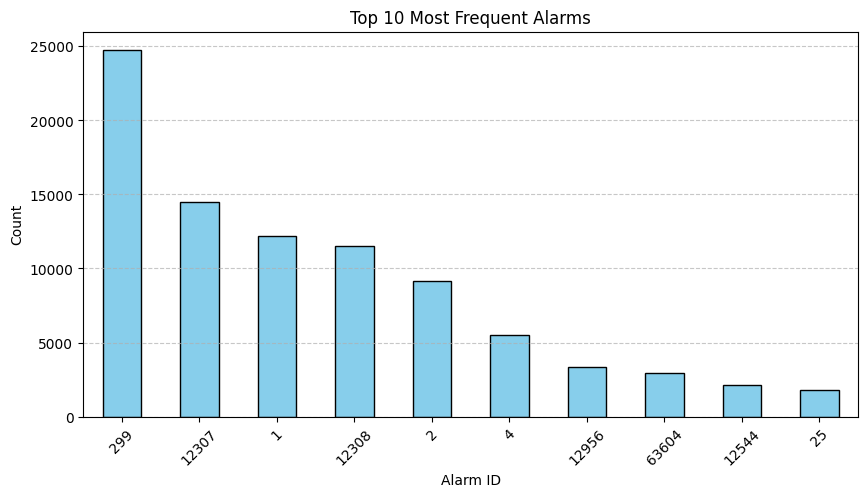

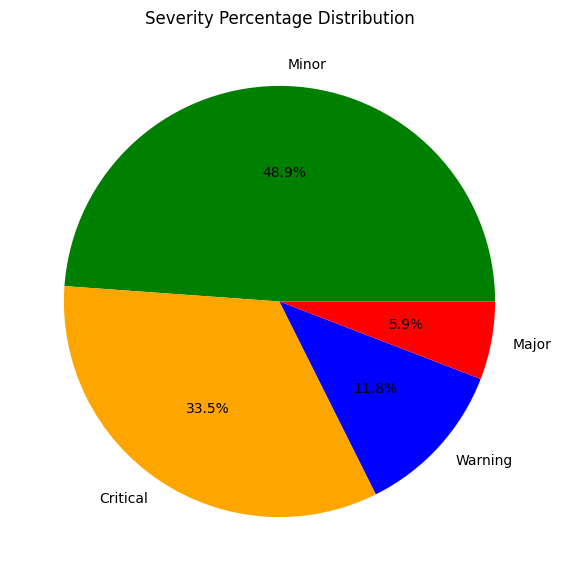

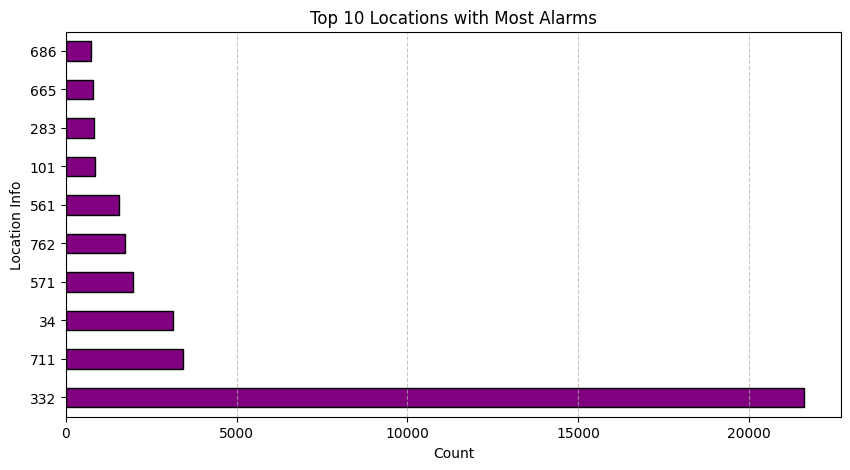

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
file_path = "Cleaned_Merged_data_alarm.csv"
df = pd.read_csv(file_path)

# Convert severity mapping back to labels for better visualization
severity_labels = {0: "Minor", 1: "Major", 2: "Warning", 3: "Critical"}
df["Severity_Label"] = df["Severity"].map(severity_labels)

# Top 10 Most Frequent Alarms
top_alarms = df["Alarm ID"].value_counts().nlargest(10)

# Severity Distribution
severity_distribution = df["Severity_Label"].value_counts(normalize=True) * 100

# Top Locations with Most Alarms
top_locations = df["Location Info"].value_counts().nlargest(10)

# Plot Top 10 Alarms
plt.figure(figsize=(10, 5))
top_alarms.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Most Frequent Alarms")
plt.xlabel("Alarm ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Severity Distribution (Pie Chart)
plt.figure(figsize=(7, 7))
severity_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange', 'blue', 'red'])
plt.title("Severity Percentage Distribution")
plt.ylabel('')  # Hide y-label
plt.show()

# Plot Top 10 Locations with Most Alarms
plt.figure(figsize=(10, 5))
top_locations.plot(kind='barh', color='purple', edgecolor='black')
plt.title("Top 10 Locations with Most Alarms")
plt.xlabel("Count")
plt.ylabel("Location Info")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
